<img src=".\images\Logo.png" width=150 align="left" /> <img src=".\images\Logo2.jpg" width=450 align="right" />


# <center><font color= #1e8449 > <b>CU25_Modelo de gestión de Lista de Espera Quirúrgica</font></center>

<font color='steelblue'><b>Citizenlab Data Science Methodology > II - Data Processing Domain </font>
***
> # <font color='steelblue'> <b>10.- Imbalanced Analysis</font>

<font color='steelblue'>Data Balancing is the process to obtain an adequate data balance if is required, in order to have the adequate amount of data that reflects the intrinsic structure of the problem to be solved.</font>

## <font color='steelblue'>Tasks</font>

<font color='steelblue'><b>Imbalanced Analysis</b>	
    
<font color='steelblue'><b>Evaluate Imbalanced Classification Models</b>
    
<font color='steelblue'><b>Select appropiate metrics</b>
    
<font color='steelblue'><b>Data Balancing</b>
    
- Undersampling the Majority Class
- Oversampling the Minority Class
- Mix under-oversampling
- Evaluate a model with random oversampling and undersampling
    
<font color='steelblue'><b>Cost-Sensitive Algorithms</b>



## <font color='green'>File</font>

- <font color='steelblue'> <b>Input File: CU_25_09.2_01_lista_espera_completo_clean_v_01</font>
- <font color='steelblue'> <b>Output File: No aplica</font>

### Encoding

Con la siguiente expresión se evitan problemas con el encoding al ejecutar el notebook. Es posible que deba ser eliminada o adaptada a la máquina en la que se ejecute el código.

In [20]:
Sys.setlocale(category = "LC_ALL", locale = "es_ES.UTF-8")

[1] "LC_COLLATE=es_ES.UTF-8;LC_CTYPE=es_ES.UTF-8;LC_MONETARY=es_ES.UTF-8;LC_NUMERIC=C;LC_TIME=es_ES.UTF-8"

## <font color='green'>Settings</font>

### Libraries to use

In [21]:
library(readr)
library(dplyr)
library(sf)
library(tidyr)
library(stringr)

### Paths

In [22]:
iPath <- "Data/Input/"
oPath <- "Data/Output/"

## <font color='green'>Data Load</font>

<font color='tomato'><b> OPCION A:</b> Seleccionar fichero en ventana para mayor comodidad</font> 

Data load using the {tcltk} package. Ucomment the line if using this option

In [23]:
# file_data <- tcltk::tk_choose.files(multi = FALSE)

<font color='tomato'><b> OPCION B:</b> Especificar el nombre de archivo</font>



In [24]:
iFile <- "CU_25_09.2_01_lista_espera_completo_clean_v_01.csv"
file_data <- paste0(iPath, iFile)

if(file.exists(file_data)){
    cat("Se leerán datos del archivo: ", file_data)
} else{
    warning("Cuidado: el archivo no existe.")
}


Se leerán datos del archivo:  Data/Input/CU_25_09.2_01_lista_espera_completo_clean_v_01.csv

#### Data file to dataframe

Usar la función adecuada según el formato de entrada (xlsx, csv, json, ...)

In [31]:
data <- read.csv(file_data)


<font color='tomato'>Visualizo los datos.</font>

Estructura de  los datos:

In [26]:
data |> glimpse()

Rows: 55,216
Columns: 46
$ Hospital          <chr> "HOSPITAL REY JUAN CARLOS", "HOSPITAL CENTRAL DE LA …
$ Especialidad      <chr> "UROLOGÍA", "ODONTOESTOMATOLOGÍA", "GINECOLOGÍA", "D…
$ total_pacientes   <dbl> 344, 0, 52, 37, 0, 4, 0, 718, 0, 271, 108, 0, 34, 86…
$ ano               <dbl> 2021, 2020, 2021, 2021, 2021, 2020, 2021, 2020, 2021…
$ semana            <dbl> 30, 36, 49, 23, 3, 5, 50, 7, 35, 1, 42, 10, 21, 33, …
$ CODCNH            <dbl> 281348, 280724, 281292, 281292, 281236, 280724, 2807…
$ id_area           <dbl> 8, 7, 11, 11, 11, 7, 3, 6, 1, 2, 2, 8, 11, 11, 1, 3,…
$ nombre_area       <chr> "SUR-OESTE I", "CENTRO-OESTE", "SUR II", "SUR II", "…
$ cmunicipio        <dbl> 280920, 280796, 280133, 280133, 281610, 280796, 2800…
$ Municipio         <chr> "MÓSTOLES", "MADRID", "ARANJUEZ", "ARANJUEZ", "VALDE…
$ CAMAS             <dbl> 382, 475, 98, 98, 182, 475, 507, 613, 269, 1143, 156…
$ Clase             <chr> "HOSPITALES GENERALES", "HOSPITALES GENERALES", "HOS…
$ Dependencia  

Muestra de los primeros datos:

In [27]:
data |> slice_head(n = 5)

Hospital,Especialidad,total_pacientes,ano,semana,CODCNH,id_area,nombre_area,cmunicipio,Municipio,⋯,t9_1,t10_1,t11_1,t12_1,capacidad,pacientes,consultas,hospitalizaciones,Target,is_train
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
HOSPITAL REY JUAN CARLOS,UROLOGÍA,344,2021,30,281348,8,SUR-OESTE I,280920,MÓSTOLES,⋯,0.3348780,0.1369254,0.5072726,0.5849309,17,1447,573,12,54.45,TRUE
HOSPITAL CENTRAL DE LA DEFENSA GOMEZ ULLA,ODONTOESTOMATOLOGÍA,0,2020,36,280724,7,CENTRO-OESTE,280796,MADRID,⋯,0.4914365,0.1217100,0.4915713,0.5597213,0,1211,45,0,0.00,TRUE
HOSPITAL UNIVERSITARIO DEL TAJO,GINECOLOGÍA,52,2021,49,281292,11,SUR II,280133,ARANJUEZ,⋯,0.3346063,0.1517321,0.5024130,0.5900028,8,1293,108,2,37.96,TRUE
HOSPITAL UNIVERSITARIO DEL TAJO,DERMATOLOGÍA,37,2021,23,281292,11,SUR II,280133,ARANJUEZ,⋯,0.3346063,0.1517321,0.5024130,0.5900028,5,1501,103,2,23.14,TRUE
HOSPITAL UNIVERSITARIO INFANTA ELENA,ODONTOESTOMATOLOGÍA,0,2021,3,281236,11,SUR II,281610,VALDEMORO,⋯,0.3346063,0.1517321,0.5024130,0.5900028,0,1240,44,0,0.00,TRUE


## Imbalanced Analysis

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    0.00   35.90   42.25   68.49  356.00 

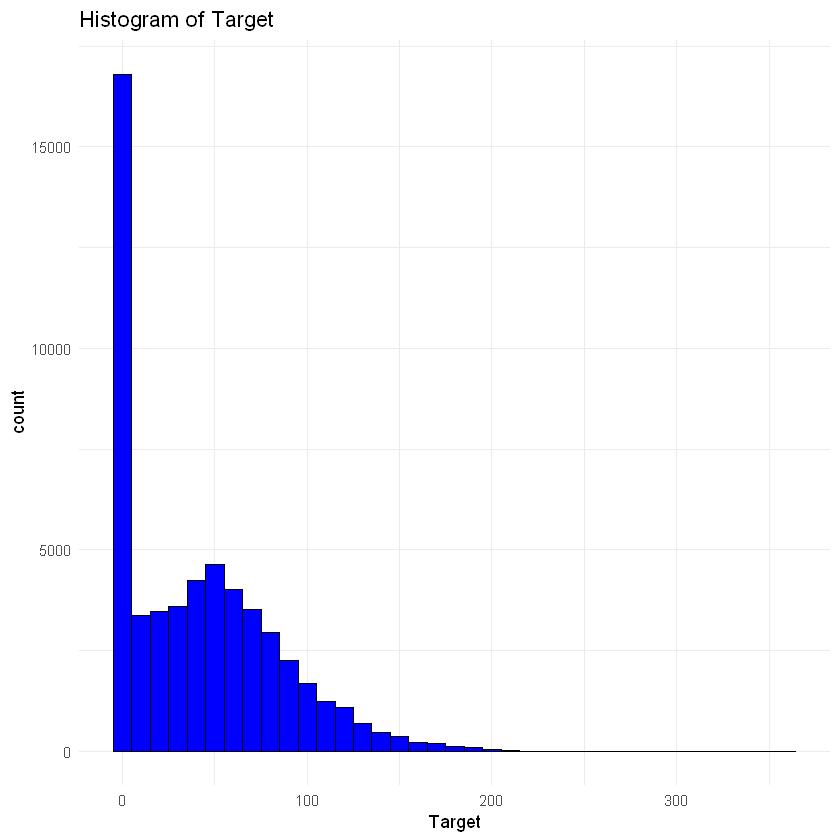

In [28]:
# Visualizando los datos para comprobar como de balanceados están
# If not already installed, install the ggplot2 package
if(!require(ggplot2)) install.packages('ggplot2')

# Load the ggplot2 package
library(ggplot2)

# Select the column name
column_name <- "Target"  # replace with your column name

# Create a histogram of the numeric column
ggplot(data, aes_string(x = column_name)) +
  geom_histogram(binwidth = 10, fill = "blue", color = "black") +
  theme_minimal() +
  ggtitle(paste("Histogram of", column_name))

# Calculate basic statistical measures
summary(data[[column_name]])

In [29]:
# summarize class distribution


In [30]:
# Generate and plot imbalanced classification dataset


## Evaluate Imbalanced Classification Models

No aplica

## Undersampling the Majority Class


No aplica

## Oversampling the Minority Class


No aplica

## Combine Data Undersampling and Oversampling with SMOTEENN


No aplica

## Evaluating a model with random oversampling and undersampling


No aplica

## Cost-Sensitive Algorithms


No aplica

## <font color='green'>Data Save</font>

* Solo si se han hecho cambios

* No aplica

<font color='tomato'> Identificamos los datos a guardar</font>

In [ ]:
data_to_save <- data


<font color='tomato'>Estructura de nombre de archivos:</font>

* Código del caso de uso, por ejemplo "CU_04"
* Número del proceso que lo genera, por ejemplo "_06".
* Resto del nombre del archivo de entrada
* Extensión del archivo

Ejemplo: "CU_04_06_01_01_zonasgeo.json, primer fichero que se genera en la tarea 01 del proceso 05 (Data Collection) para el caso de uso 04 (vacunas) y que se ha transformado en el proceso 06

Importante mantener los guiones bajos antes de proceso, tarea, archivo y nombre

### Proceso 10

In [1]:
# caso <- "CU_XX"
# proceso <- '_10'
# tarea <- "_XX"
# archivo <- ""
# proper <- "_xxxxx"
# extension <- ".csv"

<font color='tomato'><b> OPCION A:</b> Uso del paquete "tcltk" para mayor comodidad</font>

* Buscar carpeta, escribir nombre de archivo SIN extensión (se especifica en el código)
* Especificar sufijo2 si es necesario
* Cambiar datos por datos_xx si es necesario

In [ ]:
# file_save <- paste0(caso, proceso, tarea, tcltk::tkgetSaveFile(), proper, extension) 
# path_out <- paste0(oPath, file_save)
# write_csv(data_to_save_xxxxx, path_out)

# cat('File saved as: ')
# path_out

<font color='tomato'><b> OPCION B:</b> Especificar el nombre de archivo</font>

- Los ficheros de salida del proceso van siempre a Data/Output/.  

In [ ]:
# file_save <- paste0(caso, proceso, tarea, archivo, proper, extension) 
# path_out <- paste0(oPath, file_save)
# write_csv(data_to_save_xxxxx, path_out)

# cat('File saved as: ')
# path_out

#### Copia del fichero a Input

Si el archivo se va a usar en otros notebooks, copiar a la carpeta Input

In [ ]:
# path_in <- paste0(iPath, file_save)
# file.copy(path_out, path_in, overwrite = TRUE)

## <font color='#2874a6'>REPORT</font>

A continuación se realizará un informe de las acciones realizadas

## <font color=' #2874a6 '>Main Actions Carried Out</font>

- No aplica el proceso al caso

## <font color=' #2874a6 '>Main Conclusions</font>

- Al no haber clasificación no procede analizar el desbalanceo.


## <font color='RED'>CODE TO DEPLOY (PILOT)</font>

A continuación se incluirá el código que deba ser llevado a despliegue para producción, dado que se entiende efectúa operaciones necesarias sobre los datos en la ejecución del prototipo

<font color=' red '><b>Description</b></font>

- No hay nada que desplegar en el piloto, ya que estos datos son estáticos o en todo caso cambian con muy poca frecuencia, altamente improbable durante el proyecto.


<font color=' red '><b>CODE</b></font>